# Spotipy Imports

In [1]:
import os
import json
import spotipy
import spotipy.util as util
from json.decoder import JSONDecodeError

from config import *

In [2]:
import numpy as np
import pandas as pd

### Username number

In [3]:
username = '12166626141'

In [4]:
scope_list = ['user-read-currently-playing','user-read-playback-state',\
              'user-follow-read','user-library-read','user-top-read','user-read-recently-played']

# Throw all permissions from the list into a string for token function:
scope = ' '.join(scope_list)

## Authourize access

In [5]:
token = util.prompt_for_user_token(username,scope=scope,\
    client_id=client_id,\
    client_secret=client_secret,\
    redirect_uri=redirect_uri)

# except:
#     print("exception")
#     os.remove(f'.cache-{username}')
#     token = util.prompt_for_user_token(username,scope=scope,\
#         client_id=client_id,\
#         client_secret=client_secret,\
#         redirect_uri=redirect_uri)

In [82]:
# sp = spotipy.Spotify(auth=token)
sp = spotipy.Spotify(auth="BQDBKsxpQ0pxZFsU8sKwz-f9qELx7ds_M-9_sNyP5_dHt-FfMnHhqHeyBnlQAl7Kkkr0XhVnWLL_4bp8q2y8pqefaiz-ERzWIsJalGHTrNOJ9NVeWfyXQbwcx5Mat7RK7QSK2bbHSFC7nT4bFF-ly8L5_bhUNkqQMg3iq3Xxbvl2WV364Jg")

#### To see what is stored: print(json.dumps(VARIABLE, sort_keys=True, indent=4))

### Test if search Artist is working!

In [83]:
search_input = input("Artist to search for: ")
search_results = sp.search(\
	search_input,\
	limit=1,\
	offset=0,\
	type="artist"\
	)
artist = search_results['artists']['items'][0]
print(json.dumps(artist, sort_keys=True, indent=4))

Artist to search for: Haken
{
    "external_urls": {
        "spotify": "https://open.spotify.com/artist/2SRIVGDkdqQnrQdaXxDkJt"
    },
    "followers": {
        "href": null,
        "total": 73745
    },
    "genres": [
        "djent",
        "jazz metal",
        "progressive metal",
        "progressive rock",
        "symphonic rock"
    ],
    "href": "https://api.spotify.com/v1/artists/2SRIVGDkdqQnrQdaXxDkJt",
    "id": "2SRIVGDkdqQnrQdaXxDkJt",
    "images": [
        {
            "height": 1000,
            "url": "https://i.scdn.co/image/d0bb5ef5c835325a7f4af340d391dc568383acbe",
            "width": 1000
        },
        {
            "height": 640,
            "url": "https://i.scdn.co/image/b19dbef89100e901e0bcd533affd9002e2975736",
            "width": 640
        },
        {
            "height": 200,
            "url": "https://i.scdn.co/image/d6a05ffa293e7e5a5b333f9a1197a68fd664226e",
            "width": 200
        },
        {
            "height": 64,
      

In [9]:
artist_id = artist["id"]

## Pull entire discography of albums

#### Note: artist_id defined in search section above

<hr>

### Create a track list of all unique songs in discography

In [27]:
# Use artist_id from above.
albums = sp.artist_albums(artist_id=artist_id, album_type="album")
album_ids = [album["id"] for album in albums["items"]]
album_names = [album["name"] for album in albums["items"]]
album_total_tracks = [album["total_tracks"] for album in albums["items"]]

In [28]:
album_tracks = [sp.album_tracks(album_id) for album_id in album_ids]
print(json.dumps(album_tracks, sort_keys=True, indent=4))

[
    {
        "href": "https://api.spotify.com/v1/albums/7n7uMkN6MrzRL7HQmRjpRU/tracks?offset=0&limit=50",
        "items": [
            {
                "artists": [
                    {
                        "external_urls": {
                            "spotify": "https://open.spotify.com/artist/536BYVgOnRky0xjsPT96zl"
                        },
                        "href": "https://api.spotify.com/v1/artists/536BYVgOnRky0xjsPT96zl",
                        "id": "536BYVgOnRky0xjsPT96zl",
                        "name": "Two Door Cinema Club",
                        "type": "artist",
                        "uri": "spotify:artist:536BYVgOnRky0xjsPT96zl"
                    }
                ],
                "available_markets": [
                    "AD",
                    "AE",
                    "AR",
                    "AT",
                    "AU",
                    "BE",
                    "BG",
                    "BH",
                    "BO",
         

In [29]:
track_ids = []
track_names = []
track_numbers = []

for disc in album_tracks:
    for song in disc["items"]:
        # Now we can pull song_id, song_name, and song_track_number
        track_ids.append(song["id"])
        track_names.append(song["name"])
        track_numbers.append(song["track_number"])
        
print(track_names)

['Are We Ready? (Wreck)', 'Bad Decisions', 'Ordinary', 'Gameshow', 'Lavender', 'Fever', 'Invincible', 'Good Morning', 'Surgery', 'Je Viens De La', 'Gasoline', 'Sucker', 'Ordinary - Sam Holiday Remix', "Bad Decisions - Kev's Summer Time Madness Remix", 'Gameshow - Live at Bonnaroo 2016', 'Next Year', 'Handshake', 'Wake Up', 'Sun', 'Someday', 'Sleep Alone', 'The World Is Watching', 'Settle', 'Spring', 'Pyramid', 'Beacon', 'Next Year', 'Handshake', 'Wake Up', 'Sun', 'Someday', 'Sleep Alone', 'The World Is Watching', 'Settle', 'Spring', 'Pyramid', 'Beacon', 'Cigarettes In The Theatre - Live At Brixton Academy, London / 2012', 'Undercover Martyn - Live At Brixton Academy, London / 2012', 'Do You Want It All? - Live At Brixton Academy, London / 2012', 'This Is The Life - Live At Brixton Academy, London / 2012', 'Something Good Can Work - Live At Brixton Academy, London / 2012', 'Handshake - Live At Brixton Academy, London / 2012', 'Costume Party - Live At Brixton Academy, London / 2012', "Yo

In [30]:
track_features = sp.audio_features(track_ids)
print(json.dumps(track_features, sort_keys=True, indent=4))
print(type(track_features))

[
    {
        "acousticness": 0.00476,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/3gg9BiBulbhp1yb0MEYJ8t",
        "danceability": 0.601,
        "duration_ms": 230853,
        "energy": 0.784,
        "id": "3gg9BiBulbhp1yb0MEYJ8t",
        "instrumentalness": 0.0127,
        "key": 2,
        "liveness": 0.347,
        "loudness": -5.622,
        "mode": 0,
        "speechiness": 0.0333,
        "tempo": 94.019,
        "time_signature": 4,
        "track_href": "https://api.spotify.com/v1/tracks/3gg9BiBulbhp1yb0MEYJ8t",
        "type": "audio_features",
        "uri": "spotify:track:3gg9BiBulbhp1yb0MEYJ8t",
        "valence": 0.726
    },
    {
        "acousticness": 0.0491,
        "analysis_url": "https://api.spotify.com/v1/audio-analysis/184c1MtPKQENzNJd7fIh1t",
        "danceability": 0.63,
        "duration_ms": 297787,
        "energy": 0.709,
        "id": "184c1MtPKQENzNJd7fIh1t",
        "instrumentalness": 0.00813,
        "key": 5,
        "live

In [34]:
df_feat = pd.DataFrame(track_features)
df_feat['name'] = track_names
df_feat['track_number'] = track_numbers

df_feat.drop(columns=['analysis_url','track_href','type','uri'], inplace=True)
df_feat.head(10)

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,name,track_number
0,0.00476,0.601,230853,0.784,3gg9BiBulbhp1yb0MEYJ8t,0.012700,2,0.3470,-5.622,0,0.0333,94.019,4,0.726,Are We Ready? (Wreck),1
1,0.04910,0.630,297787,0.709,184c1MtPKQENzNJd7fIh1t,0.008130,5,0.1280,-8.150,0,0.0351,105.992,4,0.407,Bad Decisions,2
2,0.11400,0.775,298933,0.577,3AEJ5MpwV4WJSFhxj04ITx,0.003090,1,0.1100,-7.638,0,0.0358,122.026,4,0.634,Ordinary,3
3,0.00164,0.555,232587,0.716,2FY3r8CFJDMYCMIVEMvTOQ,0.034800,9,0.2960,-5.802,1,0.0474,131.985,4,0.235,Gameshow,4
4,0.05720,0.833,235893,0.455,5CzcvW0EmosapUCOqkPKix,0.000950,2,0.0491,-6.026,0,0.0699,96.025,4,0.887,Lavender,5
5,0.08020,0.611,281920,0.720,2OHK6Hj0ITquxUstNPF5TM,0.405000,2,0.1780,-5.306,0,0.0481,109.943,4,0.660,Fever,6
6,0.04870,0.483,269173,0.565,2kWfO7rKJk3qFacoFW26nk,0.000863,7,0.4870,-6.063,0,0.0595,163.900,4,0.225,Invincible,7
7,0.29200,0.770,236173,0.729,48KcCzPLvlYsOnNnDBtPcp,0.000268,9,0.1510,-5.775,0,0.0306,115.032,4,0.841,Good Morning,8
8,0.10400,0.780,276333,0.485,0WB8njKkhiPStfCHlxXoPb,0.000397,5,0.0836,-7.600,1,0.0727,99.999,4,0.744,Surgery,9
9,0.01300,0.638,224627,0.750,51RgDZpnVEWHbUMZf26IWB,0.000122,11,0.0688,-5.450,0,0.0689,118.009,4,0.609,Je Viens De La,10


In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [37]:
df_stats = df_feat.drop(columns=['id','key','mode','time_signature', 'duration_ms', 'loudness','tempo','track_number', 'name'])

In [38]:
df_stats

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,valence
0,0.004760,0.601,0.784,0.012700,0.3470,0.0333,0.726
1,0.049100,0.630,0.709,0.008130,0.1280,0.0351,0.407
2,0.114000,0.775,0.577,0.003090,0.1100,0.0358,0.634
3,0.001640,0.555,0.716,0.034800,0.2960,0.0474,0.235
4,0.057200,0.833,0.455,0.000950,0.0491,0.0699,0.887
5,0.080200,0.611,0.720,0.405000,0.1780,0.0481,0.660
6,0.048700,0.483,0.565,0.000863,0.4870,0.0595,0.225
7,0.292000,0.770,0.729,0.000268,0.1510,0.0306,0.841
8,0.104000,0.780,0.485,0.000397,0.0836,0.0727,0.744
9,0.013000,0.638,0.750,0.000122,0.0688,0.0689,0.609


In [39]:
df_stats.mean()
df_stats.columns
pd.melt(df_stats)

,variable,value
0,acousticness,0.004760
1,acousticness,0.049100
2,acousticness,0.114000
3,acousticness,0.001640
4,acousticness,0.057200
5,acousticness,0.080200
6,acousticness,0.048700
7,acousticness,0.292000
8,acousticness,0.104000
9,acousticness,0.013000


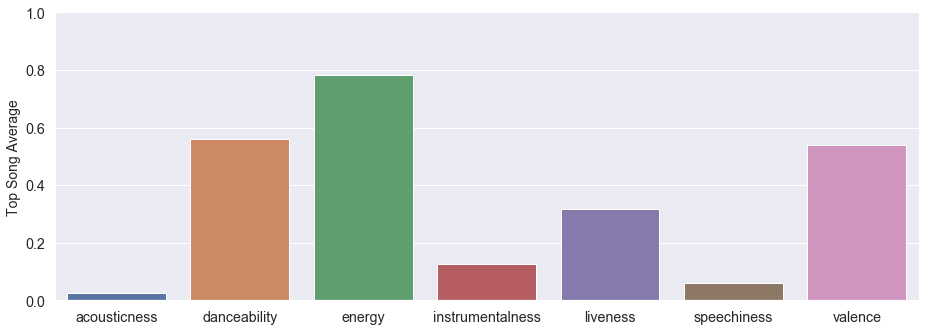

In [40]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.barplot(x=df_stats.columns, y=df_stats.mean())

ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

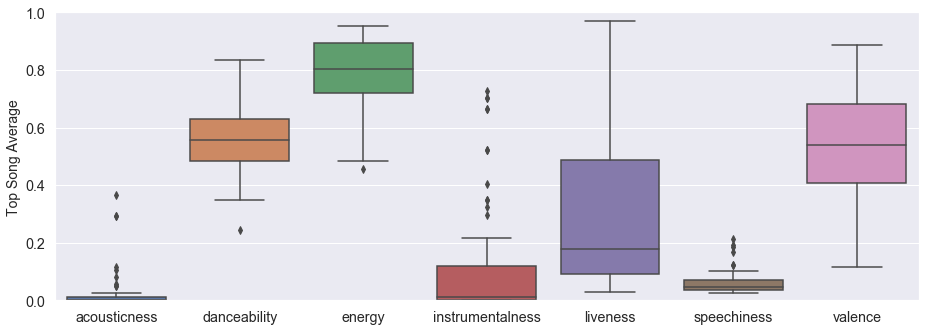

In [41]:
sns.set(style='whitegrid')
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
ax.set(ylim = (0,1))
sns.boxplot(x='variable', y='value', data=pd.melt(df_stats))
ax.set_xlabel('')
ax.set_ylabel('Top Song Average', fontsize=14)
plt.show()

## Lets make charts of the following parameters:
 - Key Signature (key map needed)
 - Tempo(make bins)
 - Mode (major=1 or minor=0)
 - Duration (make bins)
 - loudness (dB)
 - time signature (not sure if I trust it)
 <hr>

In [42]:
# map key numbers with actual letter Keys, and mode with major/minor
keyMap = {
    0:"C",
    1:"C#/Db",
    2:"D",
    3:"D#/Eb",
    4:"E",
    5:"F",
    6:"F#/Gb",
    7:"G",
    8:"G#/Ab",
    9:"A",
    10:"A#/Bb",
    11:"B",
}

modeMap = {
    0:"minor",
    1:"major",
}

In [43]:
df_feat["key"] = df_feat["key"].map(keyMap)
df_feat["mode"] = df_feat["mode"].map(modeMap)

In [44]:
df_feat

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,name,track_number
0,0.004760,0.601,230853,0.784,3gg9BiBulbhp1yb0MEYJ8t,0.012700,D,0.3470,-5.622,minor,0.0333,94.019,4,0.726,Are We Ready? (Wreck),1
1,0.049100,0.630,297787,0.709,184c1MtPKQENzNJd7fIh1t,0.008130,F,0.1280,-8.150,minor,0.0351,105.992,4,0.407,Bad Decisions,2
2,0.114000,0.775,298933,0.577,3AEJ5MpwV4WJSFhxj04ITx,0.003090,C#/Db,0.1100,-7.638,minor,0.0358,122.026,4,0.634,Ordinary,3
3,0.001640,0.555,232587,0.716,2FY3r8CFJDMYCMIVEMvTOQ,0.034800,A,0.2960,-5.802,major,0.0474,131.985,4,0.235,Gameshow,4
4,0.057200,0.833,235893,0.455,5CzcvW0EmosapUCOqkPKix,0.000950,D,0.0491,-6.026,minor,0.0699,96.025,4,0.887,Lavender,5
5,0.080200,0.611,281920,0.720,2OHK6Hj0ITquxUstNPF5TM,0.405000,D,0.1780,-5.306,minor,0.0481,109.943,4,0.660,Fever,6
6,0.048700,0.483,269173,0.565,2kWfO7rKJk3qFacoFW26nk,0.000863,G,0.4870,-6.063,minor,0.0595,163.900,4,0.225,Invincible,7
7,0.292000,0.770,236173,0.729,48KcCzPLvlYsOnNnDBtPcp,0.000268,A,0.1510,-5.775,minor,0.0306,115.032,4,0.841,Good Morning,8
8,0.104000,0.780,276333,0.485,0WB8njKkhiPStfCHlxXoPb,0.000397,F,0.0836,-7.600,major,0.0727,99.999,4,0.744,Surgery,9
9,0.013000,0.638,224627,0.750,51RgDZpnVEWHbUMZf26IWB,0.000122,B,0.0688,-5.450,minor,0.0689,118.009,4,0.609,Je Viens De La,10


## Key Signature

In [45]:
keyGroup = df_feat.groupby(by="key").count()

keyGroup.reset_index(inplace=True)

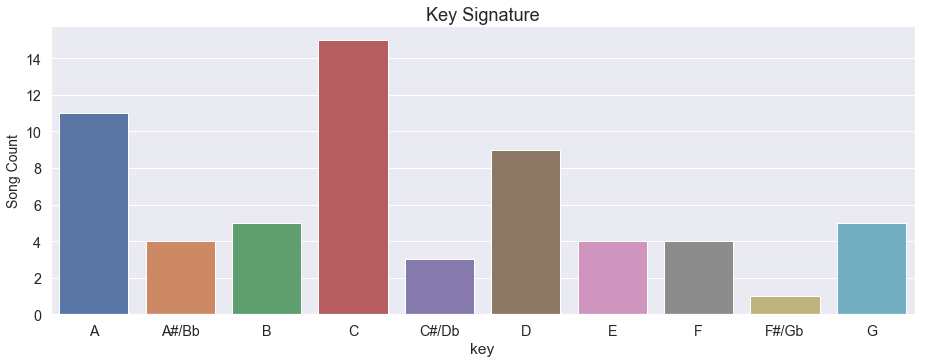

In [46]:
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.barplot(x="key",y="id",data=keyGroup)
ax.set_title("Key Signature", fontsize=18)
ax.set_ylabel('Song Count', fontsize=14)
plt.show()

## Mode

In [47]:
modeGroup = df_feat.groupby(by="mode").count()

modeGroup.reset_index(inplace=True)

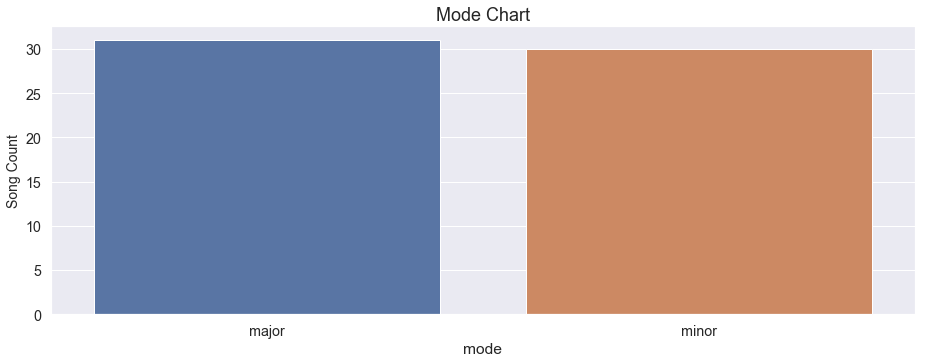

In [49]:
sns.set(font_scale=1.3) 

fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.barplot(x="mode",y="id",data=modeGroup)
ax.set_title("Mode Chart", fontsize=18)
ax.set_ylabel('Song Count', fontsize=14)
plt.show()

## Duration

In [51]:
import datetime
# convert duration to minutes
df_feat["duration"] = pd.to_timedelta(df_feat["duration_ms"], unit="ms")
# df_feat["duration"] / pd.Timedelta(minutes=1)

Text(0.5, 1.0, 'Top Songs Duration')

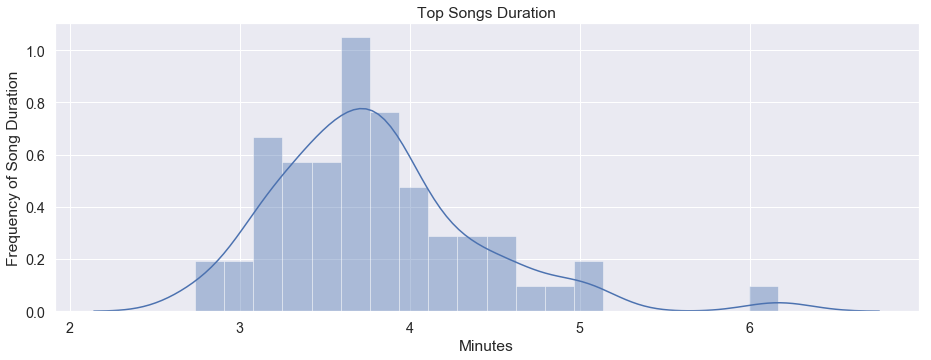

In [59]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.distplot(df_feat["duration"] / pd.Timedelta(minutes=1),
                bins=20)
ax.set_xlabel("Minutes")
ax.set_ylabel("Frequency of Song Duration")
ax.set_title("Top Songs Duration")


In [56]:
df_feat["tempo"].head()

0     94.019
1    105.992
2    122.026
3    131.985
4     96.025
Name: tempo, dtype: float64

## Tempo

Text(0.5, 1.0, 'Top Songs Duration')

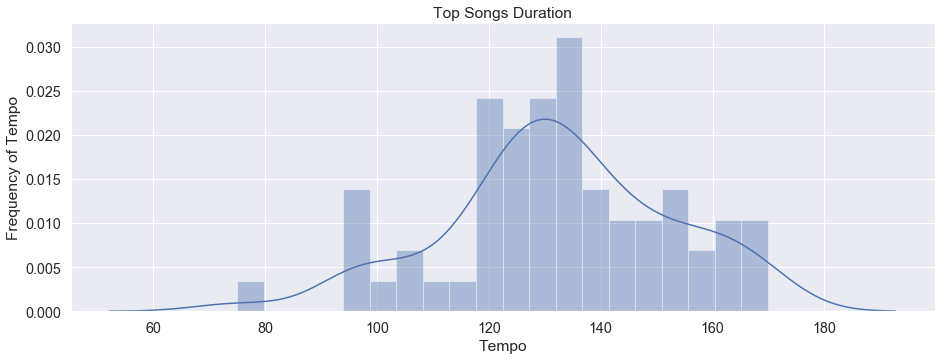

In [58]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.distplot(df_feat["tempo"],
                bins=20)
ax.set_xlabel("Tempo")
ax.set_ylabel("Frequency of Tempo")
ax.set_title("Top Songs Duration")

## Loudness

Text(0.5, 1.0, 'Top Songs Duration')

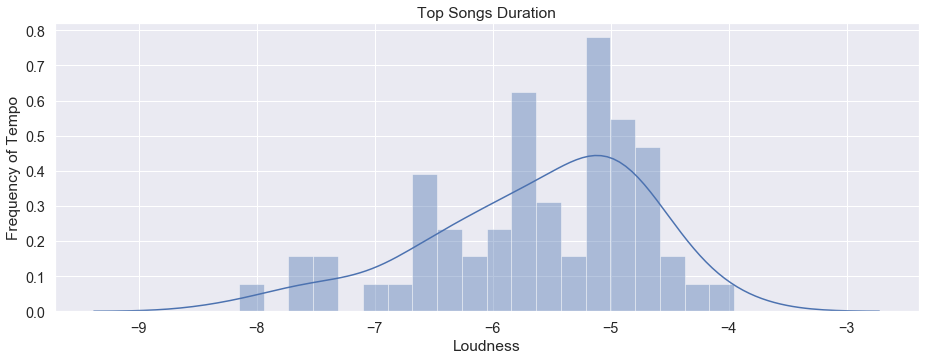

In [60]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_axes([.1,.1,.8,.8])
sns.distplot(df_feat["loudness"],
                bins=20)
ax.set_xlabel("Loudness")
ax.set_ylabel("Frequency of Tempo")
ax.set_title("Top Songs Duration")

<hr>

## Test out the recommender function:

In [61]:
sp.recommendation_genre_seeds()

{'genres': ['acoustic',
  'afrobeat',
  'alt-rock',
  'alternative',
  'ambient',
  'anime',
  'black-metal',
  'bluegrass',
  'blues',
  'bossanova',
  'brazil',
  'breakbeat',
  'british',
  'cantopop',
  'chicago-house',
  'children',
  'chill',
  'classical',
  'club',
  'comedy',
  'country',
  'dance',
  'dancehall',
  'death-metal',
  'deep-house',
  'detroit-techno',
  'disco',
  'disney',
  'drum-and-bass',
  'dub',
  'dubstep',
  'edm',
  'electro',
  'electronic',
  'emo',
  'folk',
  'forro',
  'french',
  'funk',
  'garage',
  'german',
  'gospel',
  'goth',
  'grindcore',
  'groove',
  'grunge',
  'guitar',
  'happy',
  'hard-rock',
  'hardcore',
  'hardstyle',
  'heavy-metal',
  'hip-hop',
  'holidays',
  'honky-tonk',
  'house',
  'idm',
  'indian',
  'indie',
  'indie-pop',
  'industrial',
  'iranian',
  'j-dance',
  'j-idol',
  'j-pop',
  'j-rock',
  'jazz',
  'k-pop',
  'kids',
  'latin',
  'latino',
  'malay',
  'mandopop',
  'metal',
  'metal-misc',
  'metalcore',


In [84]:
sp.recommendations(seed_genres=["alternative"], target_energy=.8, min_danceability=.6)

SpotifyException: http status: 401, code:-1 - https://api.spotify.com/v1/recommendations?limit=20&seed_genres=alternative&min_danceability=0.6&target_energy=0.8:
 The access token expired

<hr>

# Refresh Token

In [85]:
import spotipy.oauth2 as oauth

In [86]:
spo = oauth.SpotifyOAuth(client_id=client_id,\
                         client_secret=client_secret,\
                         redirect_uri=redirect_uri,\
                         scope=scope,\
                         cache_path=f'.cache-{username}'
                        )

In [87]:
cache_token_info = spo.get_cached_token()

In [88]:
refreshed_token = cache_token_info["refresh_token"]

In [90]:
new_token = spo.refresh_access_token(refreshed_token)

In [93]:
new_token = new_token["access_token"]

#### When token expires, need to run through this refresh token process!